In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [48]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [49]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [50]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [51]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [52]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ac6034d69b61fbae02a912e1760b5174


In [7]:
# Create an empty list to hold the weather data.

city_data = []

#Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tanout
Processing Record 2 of Set 1 | ada
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | siatista
Processing Record 9 of Set 1 | machala
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | discovery bay
Processing Record 17 of Set 1 | sangar
Processing Record 18 of Set 1 | burica
City not found. Skipping...
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | vao
Processing Record 21 of Set 1 | yellowknife
Pr

Processing Record 38 of Set 4 | abong mbang
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | port hedland
Processing Record 41 of Set 4 | ahipara
Processing Record 42 of Set 4 | hokitika
Processing Record 43 of Set 4 | la union
Processing Record 44 of Set 4 | mar del plata
Processing Record 45 of Set 4 | bud
Processing Record 46 of Set 4 | namtsy
Processing Record 47 of Set 4 | kardymovo
Processing Record 48 of Set 4 | haftoni
Processing Record 49 of Set 4 | hit
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | kodinsk
Processing Record 3 of Set 5 | zlobin
Processing Record 4 of Set 5 | itamaraju
Processing Record 5 of Set 5 | garowe
Processing Record 6 of Set 5 | balikpapan
Processing Record 7 of Set 5 | port-gentil
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | portoferraio
Processing Record 10 of Set 5 | lebanon
Processing Record 11 of Set 5 | chulman
Processing Record 12 

Processing Record 25 of Set 8 | komsomolskiy
Processing Record 26 of Set 8 | kholtoson
Processing Record 27 of Set 8 | mount isa
Processing Record 28 of Set 8 | hambantota
Processing Record 29 of Set 8 | igarka
Processing Record 30 of Set 8 | vaitape
Processing Record 31 of Set 8 | fayaoue
Processing Record 32 of Set 8 | carroll
Processing Record 33 of Set 8 | mentok
City not found. Skipping...
Processing Record 34 of Set 8 | muros
Processing Record 35 of Set 8 | dinga
Processing Record 36 of Set 8 | tabora
Processing Record 37 of Set 8 | palu
Processing Record 38 of Set 8 | kigorobya
Processing Record 39 of Set 8 | the valley
Processing Record 40 of Set 8 | puerto maldonado
Processing Record 41 of Set 8 | gimli
Processing Record 42 of Set 8 | zlatoustovsk
City not found. Skipping...
Processing Record 43 of Set 8 | tombouctou
Processing Record 44 of Set 8 | srednekolymsk
Processing Record 45 of Set 8 | xining
Processing Record 46 of Set 8 | malanje
Processing Record 47 of Set 8 | grand

Processing Record 10 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 11 of Set 12 | amahai
Processing Record 12 of Set 12 | kapoeta
Processing Record 13 of Set 12 | puerto leguizamo
Processing Record 14 of Set 12 | myitkyina
Processing Record 15 of Set 12 | westport
Processing Record 16 of Set 12 | yarke pole
Processing Record 17 of Set 12 | lahaina
Processing Record 18 of Set 12 | haapiti
Processing Record 19 of Set 12 | dzilam gonzalez
Processing Record 20 of Set 12 | concepcion
Processing Record 21 of Set 12 | bonavista
Processing Record 22 of Set 12 | yumen
Processing Record 23 of Set 12 | krasnozerskoye
Processing Record 24 of Set 12 | narok
Processing Record 25 of Set 12 | antofagasta
Processing Record 26 of Set 12 | yacuiba
Processing Record 27 of Set 12 | betafo
Processing Record 28 of Set 12 | lata
Processing Record 29 of Set 12 | hue
Processing Record 30 of Set 12 | kanata
-----------------------------
Data Retrieval Complete      
-------------------------

In [9]:
len(city_data)

525

In [53]:
# Convert the a rray of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicama,-7.8447,-79.1469,68.65,82,63,6.89,PE,2022-04-13 02:00:33
1,Jamestown,42.0970,-79.2353,49.17,47,44,4.94,US,2022-04-13 02:00:09
2,Provideniya,64.3833,-173.3000,24.91,80,100,18.01,RU,2022-04-13 02:00:33
3,Albany,42.6001,-73.9662,52.88,35,87,5.37,US,2022-04-13 02:00:32
4,Ushuaia,-54.8000,-68.3000,33.96,92,57,5.46,AR,2022-04-13 02:00:34
5,Kamenka,51.3223,42.7678,48.60,82,80,11.41,RU,2022-04-13 02:00:34
6,Todos Santos,23.4500,-110.2167,64.44,82,18,9.01,MX,2022-04-13 02:00:35
7,Thompson,55.7435,-97.8558,24.96,86,100,11.50,CA,2022-04-13 02:00:35
8,Jaciara,-15.9653,-54.9683,74.44,74,3,1.86,BR,2022-04-13 02:00:36
9,Puerto Suarez,-18.9500,-57.8000,80.13,71,81,3.27,BO,2022-04-13 02:00:36


In [54]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [55]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chicama,PE,2022-04-13 02:00:33,-7.8447,-79.1469,68.65,82,63,6.89
1,Jamestown,US,2022-04-13 02:00:09,42.0970,-79.2353,49.17,47,44,4.94
2,Provideniya,RU,2022-04-13 02:00:33,64.3833,-173.3000,24.91,80,100,18.01
3,Albany,US,2022-04-13 02:00:32,42.6001,-73.9662,52.88,35,87,5.37
4,Ushuaia,AR,2022-04-13 02:00:34,-54.8000,-68.3000,33.96,92,57,5.46
5,Kamenka,RU,2022-04-13 02:00:34,51.3223,42.7678,48.60,82,80,11.41
6,Todos Santos,MX,2022-04-13 02:00:35,23.4500,-110.2167,64.44,82,18,9.01
7,Thompson,CA,2022-04-13 02:00:35,55.7435,-97.8558,24.96,86,100,11.50
8,Jaciara,BR,2022-04-13 02:00:36,-15.9653,-54.9683,74.44,74,3,1.86
9,Puerto Suarez,BO,2022-04-13 02:00:36,-18.9500,-57.8000,80.13,71,81,3.27


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [58]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649820854.3209562

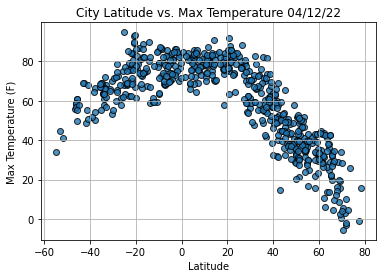

In [59]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

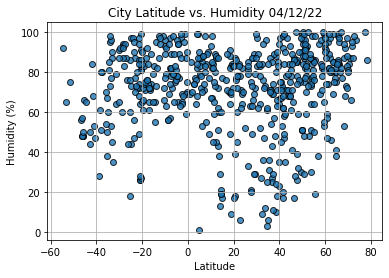

In [63]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")
# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_data/Fig2.png")

#Show Plot
plt.show()


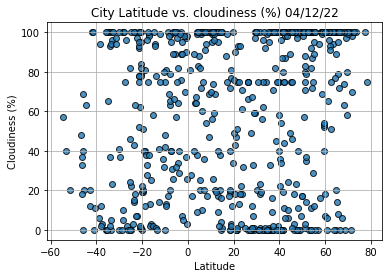

In [64]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#Incorporate the other graph properties.

plt.title(f"City Latitude vs. cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

plt.show()

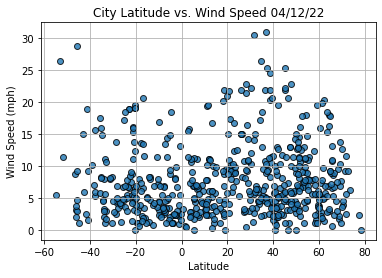

In [66]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")
#Incorporate theother graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [70]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [72]:
index13 = city_data_df.loc[13]
index13

City                San Policarpo
Country                        PH
Date          2022-04-13 02:00:38
Lat                       12.1791
Lng                      125.5072
Max Temp                    79.41
Humidity                       87
Cloudiness                    100
Wind Speed                  11.18
Name: 13, dtype: object

In [73]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2022-04-13 02:00:09,42.0970,-79.2353,49.17,47,44,4.94
2,Provideniya,RU,2022-04-13 02:00:33,64.3833,-173.3000,24.91,80,100,18.01
3,Albany,US,2022-04-13 02:00:32,42.6001,-73.9662,52.88,35,87,5.37
5,Kamenka,RU,2022-04-13 02:00:34,51.3223,42.7678,48.60,82,80,11.41
6,Todos Santos,MX,2022-04-13 02:00:35,23.4500,-110.2167,64.44,82,18,9.01


In [74]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

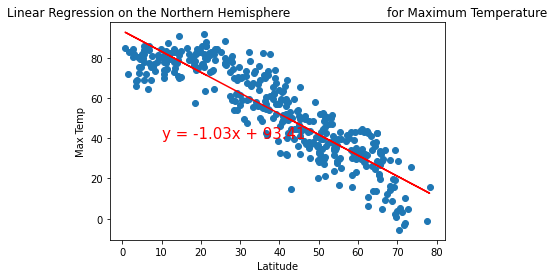

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

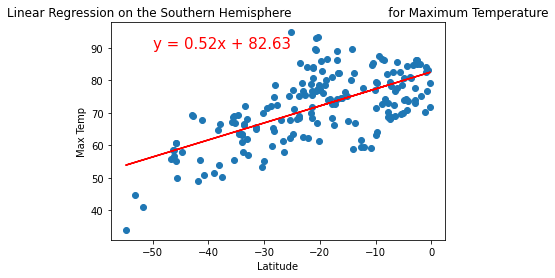

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

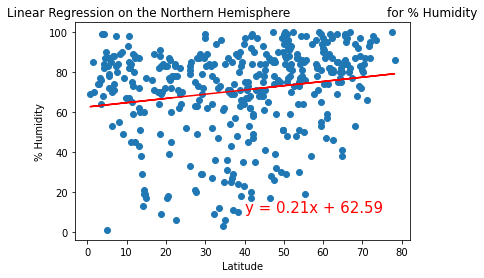

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

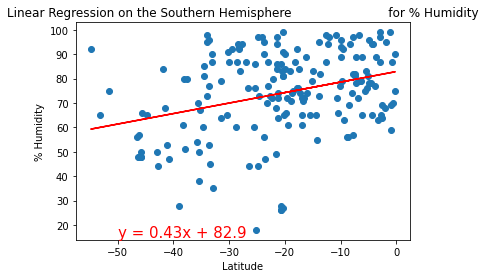

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

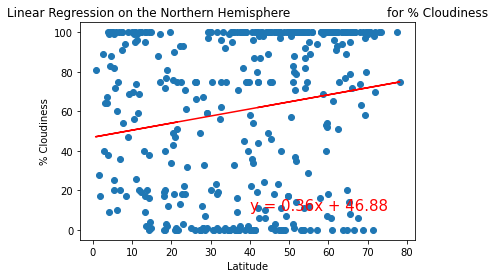

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

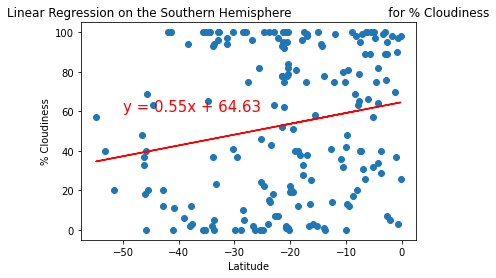

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

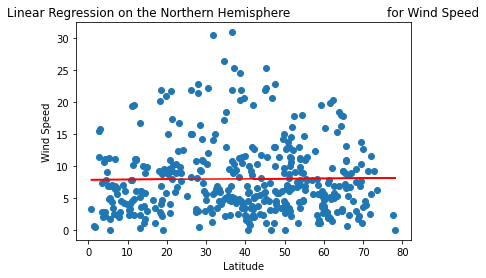

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

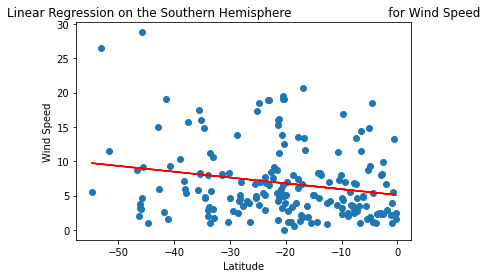

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))